# IAPI Demo

This notebook to demonstrate how we can use pythonnet (http://pythonnet.github.io/) to call Thermo's Instrument Application Programming Interface
 (https://github.com/thermofisherlsms/iapi) libraries from Python.

Import Python for .NET by importing the `clr` package below.

In [1]:
%matplotlib inline

In [2]:
import sys
import os
import glob
import datetime
import time

from IPython import display
import pylab as plt
import numpy as np

import clr

We need to add the directory containing the .dll files for IAPI to Python path.

In [3]:
ref_dir = './../../Interface/IAPI_Assembly/bin/Debug/netstandard2.0'
sys.path.append(ref_dir)

Check that we can find the assembly (package) in Python path. Here *IAPI_Assembly* is my own assembly to generate some synthetic data.

In [4]:
clr.FindAssembly('IAPI_Assembly')

'./../../Interface/IAPI_Assembly/bin/Debug/netstandard2.0\\IAPI_Assembly.dll'

Everything seems okay, so we load the assembly.

In [5]:
ref = clr.AddReference('IAPI_Assembly')
print(ref)

IAPI_Assembly, Version=1.0.0.0, Culture=neutral, PublicKeyToken=null


In [6]:
from clr import ListAssemblies
short = list(ListAssemblies(False))
short

['mscorlib',
 'clrmodule',
 'Python.Runtime',
 'System.Security',
 'System.Xml',
 'System.Configuration',
 'System.Data.SqlXml',
 'System.Core',
 'System',
 '__CodeGenerator_Assembly',
 'e__NativeCall_Assembly',
 'IAPI_Assembly',
 'netstandard',
 'Fusion.API-1.0',
 'API-2.0',
 'Spectrum-1.0']

*FusionContainer* is a class written in C#. It loads scans from an .mzML file and uses the interfaces from IAPI for the objects that holds the data.

In [7]:
from IAPI_Assembly import FusionContainer

In [8]:
filename = 'C:\\Users\\joewa\\Work\\git\\clms\\test_data\\Beer_1_full1.mzML'
fusionContainer = FusionContainer(filename)

In [9]:
fusionContainer.StartOnlineAccess()

In [10]:
while not fusionContainer.ServiceConnected:
    time.sleep(0.1)

In [11]:
fusionAccess = fusionContainer.Get(1)

In [12]:
fusionScanContainer = fusionAccess.GetMsScanContainer(0)

Register an event handler to handle arriving scans. New scans arrive following the elution time specified in the mzML file. Below we just plot them.

In [13]:
def my_handler(sender, e):
    scan = e.GetScan()
    mzs = []
    intensities = []
    for c in scan.Centroids:
        mzs.append(c.Mz)
        intensities.append(c.Intensity)
    mzs = np.array(mzs)
    intensities = np.array(intensities)
    plt.clf()
    plt.plot(mzs, intensities)
    plt.title('Scan {0} -- {1} peaks'.format(scan.Header['Scan'], scan.CentroidCount))
    display.clear_output(wait=True)
    display.display(plt.gcf())

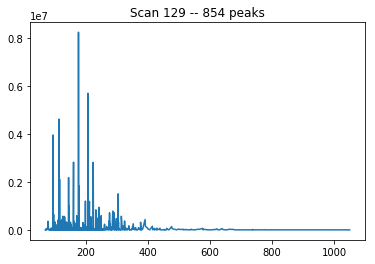

In [14]:
fusionScanContainer.MsScanArrived += my_handler